In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget https://us.openslr.org/resources/12/train-clean-360.tar.gz

--2023-06-06 18:42:28--  https://us.openslr.org/resources/12/train-clean-360.tar.gz
Resolving us.openslr.org (us.openslr.org)... 46.101.158.64
Connecting to us.openslr.org (us.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23049477885 (21G) [application/x-gzip]
Saving to: ‘train-clean-360.tar.gz’

train-clean-360.tar 100%[===================>]  21.47G  26.8MB/s    in 14m 6s  

2023-06-06 18:56:34 (26.0 MB/s) - ‘train-clean-360.tar.gz’ saved [23049477885/23049477885]



In [ ]:
!tar -xf  '/content/train-clean-360.tar.gz'

In [ ]:
#Script to get max duration
import os
import pandas as pd
import librosa
import numpy as np
from librosa.util import pad_center

# Set the path to the LibriSpeech dataset
librispeech_path = '/content/LibriSpeech/train-clean-360'

# Create a list of all audio files in the dataset
audio_files = []
for root, dirs, files in os.walk(librispeech_path):
    for file in files:
        if file.endswith('.flac'):
            audio_files.append(os.path.join(root, file))

# Find the maximum duration of all audio samples
max_duration = 0
for audio_file in audio_files:
    duration = librosa.get_duration(filename=audio_file)
    if duration > max_duration:
        max_duration = duration

<ipython-input-10-f2647bd9dd3b>:21: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_file)


In [ ]:
print(max_duration)

24.525


In [ ]:
#Script to create MFCCs
import os
import pandas as pd
import librosa
import numpy as np
from librosa.util import pad_center

# Set the path to the LibriSpeech dataset
librispeech_path = '/content/LibriSpeech/train-clean-360'
initial_path = '/content/Train_Spectrogram'

# Create a list of all audio files in the dataset
audio_files = []
for root, dirs, files in os.walk(librispeech_path):
    for file in files:
        if file.endswith('.flac'):
            audio_files.append(os.path.join(root, file))

# Find the maximum duration of all audio samples
#max_duration = 0
#for audio_file in audio_files:
 #   duration = librosa.get_duration(filename=audio_file)
  #  if duration > max_duration:
   #     max_duration = duration

# Create a pandas dataframe to store the MFCCs for each audio file
#mfcc_df = pd.DataFrame(columns=['audio_file', 'mfccs'])
max_pad_length = int(24.525*16000)
# Loop over all audio files and extract MFCCs
for audio_file in audio_files:
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=16000)
    y = y[:3*sr-1]
    #if len(y)<3*sr:
    #  y = librosa.util.fix_length(y, size = max_pad_length)

    y = librosa.effects.preemphasis(y, coef=0.97)
    file = audio_file.split('/')[-1]
    # Pad the audio signal to the maximum duration
    #y_padded = librosa.util.fix_length(y, size = max_pad_length)

    # Extract the MFCCs
    #mfcc_norm = librosa.feature.mfcc(y=y_padded,sr=sr,n_mfcc=40,n_fft=2048,hop_length=160)
    #mfcc_delta = librosa.feature.delta(mfcc_norm)
    #mfcc_delta2 = librosa.feature.delta(mfcc_norm, order=2)
    #mfcc_final = np.concatenate((mfcc_norm,mfcc_delta,mfcc_delta2))
    if len(y) > 0:
    # Generate the mel spectrogram
      mel_spectrogram = librosa.feature.melspectrogram(y=y,sr=sr,hop_length=160,window='hann',n_fft=512,n_mels=64,win_length=400)
      log_mel = librosa.power_to_db(mel_spectrogram,ref=np.max)
    else:
    # Handle the empty signal case
      print("Error: Input audio signal is empty.",audio_file,len(y))



    # Add the MFCCs to the dataframe
    #mfcc_df = mfcc_df.append({'audio_file': file, 'mfccs': mfccs.T}, ignore_index=True)
    path = path_string = os.path.join(initial_path, file + ".np")
    a = log_mel.T
    np.save(path,a)

In [ ]:
#Script for train.100
import os
import h5py
import numpy as np

# Define directory path
directory_path = "/content/Train_Spectrogram"

# Create an HDF5 file
hdf5_file = h5py.File("FinalMFCC360.hdf5", "w")

# Traverse through directory
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith(".npy"):
            # Load MFCC vector from file
            mfcc = np.load(os.path.join(root, file))

            # Transpose MFCC vector
            #mfcc_t = np.transpose(mfcc)
            samp = file.split('.')[0]

            # Add MFCC vector to HDF5 file
            hdf5_file.create_dataset(samp, data=mfcc)

# Close the HDF5 file
hdf5_file.close()


In [ ]:
import shutil
shutil.rmtree("/content/LibriSpeech")

In [ ]:
shutil.rmtree("/content/Train_Numpy_Spectrogram")

In [ ]:
# Read the HDF5 file
import h5py
import pandas as pd
import numpy as np

# Open HDF5 file
with h5py.File('/content/FinalMFCC.hdf5', 'r') as hf:
    # Get list of keys (file names)
    keys = list(hf.keys())
    # Create empty lists for file names and MFCCs
    file_names = []
    mfccs = []
    # Iterate over keys and read data into lists
    for key in keys:
        file_names.append(key)
        mfccs.append(np.array(hf[key]))
    # Create DataFrame from lists
    datas = pd.DataFrame({'filename': file_names, 'mfcc': mfccs})


In [ ]:
a = np.load('/content/Train_Numpy_Spectrogram/103-1240-0001.flac.np.npy')
a.shape

(128, 1000)

TypeError: ignored

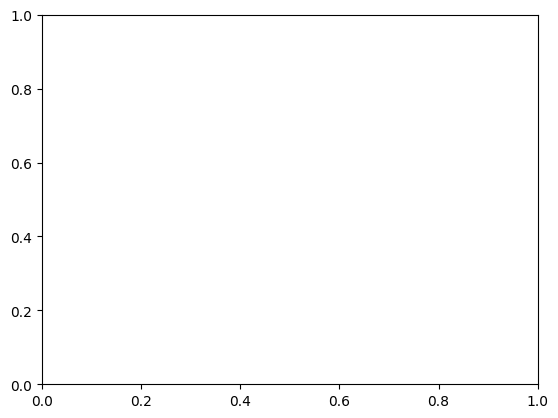

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

S_dB = np.load('/content/Train_Numpy/1272-128104-0000.flac.np.npy')
img = librosa.display(S_dB)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

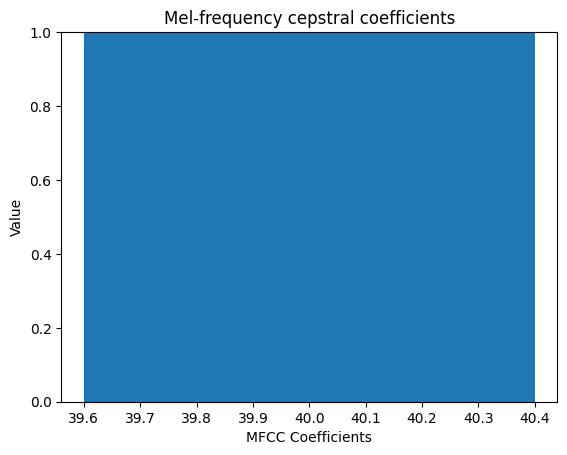

In [ ]:
plt.bar(40, S_dB)
plt.xlabel('MFCC Coefficients')
plt.ylabel('Value')
plt.title('Mel-frequency cepstral coefficients')
plt.ylim([0,1])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/FinalMFCC360.hdf5 /content/drive/MyDrive/New_Train_100

In [ ]:
!wget https://us.openslr.org/resources/12/train-clean-100.tar.gz

--2023-06-06 21:02:34--  https://us.openslr.org/resources/12/train-clean-100.tar.gz
Resolving us.openslr.org (us.openslr.org)... 46.101.158.64
Connecting to us.openslr.org (us.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6387309499 (5.9G) [application/x-gzip]
Saving to: ‘train-clean-100.tar.gz’

train-clean-100.tar 100%[===================>]   5.95G  25.5MB/s    in 4m 1s   

2023-06-06 21:06:36 (25.2 MB/s) - ‘train-clean-100.tar.gz’ saved [6387309499/6387309499]



In [ ]:
!cp /content/train-clean-100.tar.gz /content/drive/MyDrive/New_Train_100

In [ ]:
import h5py
#Loading dataset
with h5py.File('/content/drive/MyDrive/New_Train_100/Train_Spectrogram_SV3s.hdf5', 'r') as hf:
    # Get list of keys (file names)
    keys = list(hf.keys())
    # Create empty lists for file names and MFCCs
    filenames = []
    mfccs = []
    # Iterate over keys and read data into lists
    for key in keys:
        filenames.append(key)
        mfccs.append(np.array(hf[key]))
    # Create DataFrame from lists
    data_transcripts = pd.DataFrame({'filename': filenames, 'mfccs': mfccs})

In [ ]:
data_transcripts['labels'] = data_transcripts['filename'].apply(lambda x: x.split('-')[0])

In [ ]:
label_mapping = {label: idx for idx, label in enumerate(data_transcripts['labels'].unique())}

# Map the labels using the dictionary
data_transcripts['labels'] = data_transcripts['labels'].map(label_mapping)

In [ ]:
import json
with open("label_mapping.json", "w") as fp:
    json.dump(label_mapping , fp)

In [ ]:
!cp /content/label_mapping.json /content/drive/MyDrive/New_Train_100/model_sr

In [ ]:
shuffled_df = data_transcripts.sample(frac=1).reset_index(drop=True)

In [ ]:
shuffled_df.head()

,filename,mfccs,labels
0,2196-170151-0000,"[[-66.59022, -61.987404, -65.715935, -70.11608...",48
1,5390-30102-0027,"[[-54.191635, -59.795525, -52.04177, -51.50340...",150
2,911-128684-0068,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...",250
3,7367-86737-0012,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...",206
4,1578-140045-0021,"[[-53.0839, -60.09015, -65.04676, -65.67566, -...",22


In [ ]:
with h5py.File("shuffled_data.hdf5", "w") as file:
    # Create a group to store the spectrogram datasets
    group = file.create_group("spectrograms")

    # Iterate over the DataFrame rows and store each spectrogram as a dataset
    for index, row in shuffled_df.iterrows():
        mfccs = row["mfccs"]
        filename = row["filename"]

        # Create a dataset for each spectrogram
        group.create_dataset(filename, data=mfccs)

In [ ]:
!cp /content/shuffled_data.hdf5 /content/drive/MyDrive/New_Train_100/model_sr

In [ ]:
import h5py
import pandas as pd
# Create empty lists to store the filename and spectrogram data
filenames = []
spectrograms = []

# Read the HDF5 file and access the spectrogram datasets
with h5py.File("/content/drive/MyDrive/New_Train_100/model_sr/shuffled_data.hdf5", "r") as file:
    # Access the "spectrograms" group
    group = file["spectrograms"]

    # Get the list of dataset names within the group
    dataset_names = list(group.keys())

    # Iterate over the dataset names and retrieve the filename and spectrogram data
    for dataset_name in dataset_names:
        # Append the filename to the list
        filenames.append(dataset_name)

        # Access the dataset by its name
        dataset = group[dataset_name]

        # Retrieve the spectrogram data as a NumPy ndarray
        spectrogram_data = dataset[:]

        # Append the spectrogram data to the list
        spectrograms.append(spectrogram_data)

# Create a DataFrame from the retrieved data
shuffled_df = pd.DataFrame({"filename": filenames, "mfccs": spectrograms})

In [ ]:
print(len(shuffled_df))

28539


In [ ]:
shuffled_df.head()

,filename,mfccs
0,103-1240-0000,"[[-44.801823, -43.445126, -43.20101, -43.24001..."
1,103-1240-0001,"[[-45.564575, -43.17925, -40.812675, -42.47663..."
2,103-1240-0002,"[[-50.997707, -50.385807, -50.01833, -49.90954..."
3,103-1240-0003,"[[-51.141365, -45.95283, -47.726612, -46.55545..."
4,103-1240-0004,"[[-44.96881, -43.193565, -42.236378, -43.17283..."


In [ ]:
print(type(shuffled_df['mfccs'][0]))

<class 'numpy.ndarray'>


In [ ]:
train = shuffled_df[:len(shuffled_df)*9//10]
test = shuffled_df[len(shuffled_df)*9//10:]

In [ ]:
with h5py.File("test_data.hdf5", "w") as file:
    # Create a group to store the spectrogram datasets
    group = file.create_group("spectrograms")

    # Iterate over the DataFrame rows and store each spectrogram as a dataset
    for index, row in test.iterrows():
        mfccs = row["mfccs"]
        filename = row["filename"]

        # Create a dataset for each spectrogram
        group.create_dataset(filename, data=mfccs)

In [ ]:
!cp /content/train_data.hdf5 /content/drive/MyDrive/New_Train_100/model_sr

In [ ]:
!cp /content/test_data.hdf5 /content/drive/MyDrive/New_Train_100/model_sr